In [97]:
import Graphics.Color.Demo
import Graphics.Image as I
import Data.Typeable
:set -XDataKinds

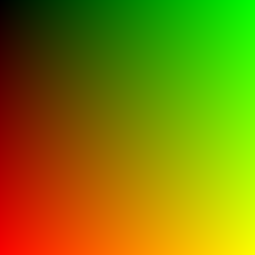

In [9]:
-- Optionally look at real life example
:! xdg-open https://blender.stackexchange.com/questions/80034/fix-hsv-to-rgb-conversion

In [100]:
import qualified Graphics.Color.Model as CM

-- > everywhere I looked this converted to Hex 33FF85 - even in Blender
CM.ColorRGB 0x33 0xff 0x85 :: Color CM.RGB Word8

-- > when I convert it to RGB
CM.hsv2rgb (CM.ColorHSV 0.4 0.8 1.0)
toWord8 <$> CM.hsv2rgb (CM.ColorHSV 0.4 0.8 1.0)

-- > What blender gives
dcctf $ toBaseSpace (ColorHSV 0.4 0.8 1.0 :: Color (HSV (SRGB 'NonLinear)) Float)


<RGB:( 51,255,133)>

<RGB:( 0.2000000000000000, 1.0000000000000000, 0.5200000000000002)>

<RGB:( 51,255,133)>

<SRGB 'Linear:( 0.03310476, 1.00000000, 0.23302203)>

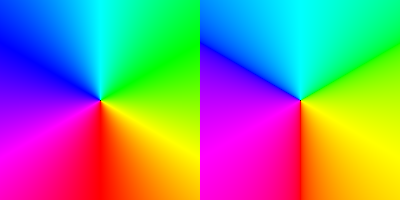

In [107]:
makeHueGradient3D :: Typeable l => Sz2 -> I.Image (I.HSV (SRGB l)) Float
makeHueGradient3D sz@(Sz2 m n) =
  I.makeImage sz $ \ (i :. j) -> g ((fromIntegral j / nd) - 0.5) (-(fromIntegral i / md) + 0.5)
  where
    (md, nd) = (fromIntegral m, fromIntegral n) :: (Float, Float)
    g x y = 
      let offset = if x >= 0 then pi/4 else 3*pi/4
          alpha = offset + atan (y / x) / 2
          x' = cos alpha 
          y' = sin alpha
      in PixelHSV (atan2 y' x' / pi) 1 1

nl = makeHueGradient3D 200 :: I.Image (I.HSV (SRGB 'NonLinear)) Float
l = makeHueGradient3D 200 :: I.Image (I.HSV (SRGB 'Linear)) Float
leftToRight (I.map (liftPixel toBaseSpace) nl) (I.map convertPixel l)